<a href="https://colab.research.google.com/github/mskv99/Defect-Detection/blob/main/DefectYolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov5

%cd /content/yolov5
%pip install -r requirements.txt
%pip install -q roboflow

import torch 
import os
from IPython.display import Image, clear_output

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")


Cloning into 'yolov5'...
remote: Enumerating objects: 15656, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 15656 (delta 137), reused 179 (delta 102), pack-reused 15393
Receiving objects: 100% (15656/15656), 14.66 MiB | 24.52 MiB/s, done.
Resolving deltas: 100% (10661/10661), done.
/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.7 MB/s eta 0:00:00
Setup co

In [ ]:
#set up enviroment
os.environ["DATASET_DIRECTORY"] = '/content/datasets'


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="YrBQIkPs3zPlUZ2J6fSi")
project = rf.workspace("molecular-electronics-research-institute").project("defect-detection-ikxln")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/Defect-Detection-1 in yolov5pytorch:: 100%|██████████| 712/712 [00:00<00:00, 2101.47it/s]


In [ ]:
!pwd

/content/yolov5


In [ ]:
%cd /content/yolov5/
!pwd


/content/yolov5
/content/yolov5


In [ ]:
!python train.py --img 640 --batch 16 --epochs 30 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/Defect-Detection-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-162-gc3e4e94 Python-3.10.11 torch-2.0.0+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0,

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.1 --source {dataset.location}/test/images


detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/Defect-Detection-1/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-162-gc3e4e94 Python-3.10.11 torch-2.0.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
image 1/32 /content/datasets/Defect-Detection-1/test/images/E04_M0176-01MS_jpg.rf.10192e849d83b930b4f63b5b6b090480.jpg: 640x640 1 normal, 4 srafs, 318.9ms
image 2/32 /content/datasets/Defect-Detection-1/test/images/E04_M0262-01MS_jpg.rf.db83e4c027bc897fb09f42b1c5ac4b99.jpg: 64

In [ ]:
import glob 
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'):
  display(Image(filename=imageName))
  print('\n')


In [ ]:
from utils.plots import plot_results
plot_results('/content/yolov5/runs/train/exp/results.png')


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
%cp /content/yolov5/runs/train/exp/weights/best.pt /content/gdrive/MyDrive/Colab\ Notebooks



cp: cannot stat '/content/yolov5/runs/train/exp/weights/best.pt': No such file or directory


In [ ]:
!zip -r yolo_zip.zip /content/yolov5


  adding: content/yolov5/ (stored 0%)
  adding: content/yolov5/CONTRIBUTING.md (deflated 56%)
  adding: content/yolov5/README.md (deflated 79%)
  adding: content/yolov5/__pycache__/ (stored 0%)
  adding: content/yolov5/__pycache__/val.cpython-310.pyc (deflated 43%)
  adding: content/yolov5/__pycache__/export.cpython-310.pyc (deflated 50%)
  adding: content/yolov5/benchmarks.py (deflated 68%)
  adding: content/yolov5/data/ (stored 0%)
  adding: content/yolov5/data/Argoverse.yaml (deflated 55%)
  adding: content/yolov5/data/coco.yaml (deflated 49%)
  adding: content/yolov5/data/coco128.yaml (deflated 47%)
  adding: content/yolov5/data/scripts/ (stored 0%)
  adding: content/yolov5/data/scripts/get_coco.sh (deflated 59%)
  adding: content/yolov5/data/scripts/get_imagenet.sh (deflated 53%)
  adding: content/yolov5/data/scripts/get_coco128.sh (deflated 36%)
  adding: content/yolov5/data/scripts/download_weights.sh (deflated 43%)
  adding: content/yolov5/data/coco128-seg.yaml (deflated 47%)
 

In [ ]:
import torch
import os 

In [ ]:
# new_model = torch.load('/content/gdrive/MyDrive/Colab Notebooks/best.pt')
# new_model
new_model = torch.hub.load('ultralytics/yolov5', 'custom', '/content/gdrive/MyDrive/Colab Notebooks/best.pt')
new_model

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-165-ge382d4c Python-3.10.11 torch-2.0.0+cu118 CPU



[Errno 2] No such file or directory: '/usr/local/lib/python3.10/dist-packages/pyparsing-3.0.9.dist-info/METADATA'


Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [ ]:
! unzip /content/collapse_jpg_format.zip

Archive:  /content/collapse_jpg_format.zip
  inflating: collapse_jpg_format/E04_M1047-02MS.jpg  
  inflating: collapse_jpg_format/E04_M1052-01MS.jpg  
  inflating: collapse_jpg_format/E04_M1055-01MS.jpg  
  inflating: collapse_jpg_format/E04_M1064-01MS.jpg  
  inflating: collapse_jpg_format/E04_M1065-01MS.jpg  
  inflating: collapse_jpg_format/E04_M1068-01MS.jpg  
  inflating: collapse_jpg_format/E04_M1069-01MS.jpg  
  inflating: collapse_jpg_format/E04_M1104-01MS.jpg  
  inflating: collapse_jpg_format/E04_M1106-01MS.jpg  
  inflating: collapse_jpg_format/E04_M1112-01MS.jpg  
  inflating: collapse_jpg_format/S04_M1011-01MS.jpg  
  inflating: collapse_jpg_format/S04_M1014-01MS.jpg  
  inflating: collapse_jpg_format/S04_M1017-01MS.jpg  
  inflating: collapse_jpg_format/S04_M1020-01MS.jpg  
  inflating: collapse_jpg_format/S04_M1023-01MS.jpg  
  inflating: collapse_jpg_format/S04_M1026-01MS.jpg  
  inflating: collapse_jpg_format/S04_M1029-01MS.jpg  
  inflating: collapse_jpg_format/S04_M1

In [ ]:
def inference(RES_DIR, data_path):
    # Directory to store inference results.
    infer_dir_count = len(glob.glob('runs/detect/*'))
    print(f"Current number of inference detection directories: {infer_dir_count}")
    INFER_DIR = f"inference_{infer_dir_count+1}"
    print(INFER_DIR)
    # Inference on images.
    !python detect.py --weights runs/train/{RES_DIR}/weights/best.pt \
    --source {data_path} --name {INFER_DIR}
    return INFER_DIR

In [ ]:
data_path = '/content/E04_M0429-01MS.jpg'

!python detect.py --weights new_model \
--source {data_path} --name {INFER_DIR}

detect: weights=['new_model'], source={data_path}, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name={INFER_DIR}, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-165-ge382d4c Python-3.10.11 torch-2.0.0+cu118 CPU

Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 256, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov5/detect.py", line 98, in run
    model = DetectMultiBackend(weights, device=device, dnn=dnn, data=data, fp16=half)
  File "/content/yolo

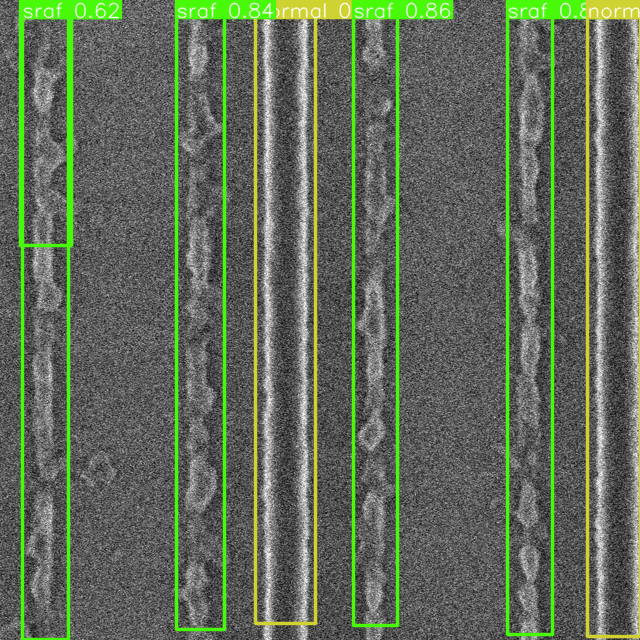

In [ ]:
from PIL import Image
im = Image.open('/content/E04_M0429-01MS.jpg')
im = im.resize((640, 640))

result = new_model(im)
result.show()


In [ ]:
import os
import matplotlib.pyplot as plt


os.listdir('/content/yolov5/collapse_jpg_format')

['S04_M1100-01MS.jpg',
 'S04_M1076-01MS.jpg',
 'S04_M1017-01MS.jpg',
 'S04_M1077-01MS.jpg',
 'S04_M1086-01MS.jpg',
 'S04_M1032-01MS.jpg',
 'S04_M1110-01MS.jpg',
 'S04_M1108-01MS.jpg',
 'S04_M1087-01MS.jpg',
 'S04_M1073-01MS.jpg',
 'E04_M1069-01MS.jpg',
 'E04_M1112-01MS.jpg',
 'S04_M1014-01MS.jpg',
 'S04_M1090-01MS.jpg',
 'S04_M1023-01MS.jpg',
 'S04_M1099-01MS.jpg',
 'S04_M1053-01MS.jpg',
 'S04_M1097-01MS.jpg',
 'S04_M1026-01MS.jpg',
 'S04_M1092-01MS.jpg',
 'S04_M1079-01MS.jpg',
 'E04_M1106-01MS.jpg',
 'S04_M1050-01MS.jpg',
 'S04_M1071-01MS.jpg',
 'S04_M1044-01MS.jpg',
 'S04_M1020-01MS.jpg',
 'S04_M1107-01MS.jpg',
 'E04_M1065-01MS.jpg',
 'S04_M1113-01MS.jpg',
 'E04_M1064-01MS.jpg',
 'S04_M1080-01MS.jpg',
 'S04_M1058-01MS.jpg',
 'S04_M1038-01MS.jpg',
 'E04_M1047-02MS.jpg',
 'S04_M1109-01MS.jpg',
 'S04_M1056-01MS.jpg',
 'S04_M1088-01MS.jpg',
 'S04_M1095-01MS.jpg',
 'S04_M1111-01MS.jpg',
 'S04_M1105-01MS.jpg',
 'S04_M1089-01MS.jpg',
 'S04_M1074-01MS.jpg',
 'S04_M1094-01MS.jpg',
 'S04_M1093

In [ ]:

path = '/content/yolov5/collapse_jpg_format/'

for name in os.listdir(path):

  im = Image.open(os.path.join(path, name))
  im = im.resize((640, 640))  
  result = new_model(im)
  result.show()
  print('\n', '\n')






In [ ]:
img

'S04_M1102-01MS.jpg'

In [ ]:
result.print()

image 1/1: 640x640 2 normals, 5 srafs
Speed: 7.5ms pre-process, 621.0ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)


In [ ]:
result.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,587.237671,0.0,640.000000,636.653198,0.865371,4,normal
1,353.166016,0.0,397.181946,625.696167,0.858987,5,sraf
2,507.295044,0.0,552.249512,634.419495,0.858346,5,sraf
3,176.367386,0.0,224.752853,629.484253,0.835527,5,sraf
4,255.696381,0.0,315.548615,623.513794,0.827329,4,normal
5,22.359928,0.0,68.120270,639.013184,0.619007,5,sraf
6,20.448256,0.0,71.542267,245.339783,0.428591,5,sraf
